  ###  <center>Name - Ashish Kumar  
### <center> Email - ashishok88@gmail.com 
### <center> AI Minor Project Smartknower 
###  <center>Date - 18-08-2022
<br>

#### <b>Importing the Datasets</b>

In [1]:
from keras.datasets import mnist 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report

#### <b>Train and Test split of Data</b>

In [2]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)   

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


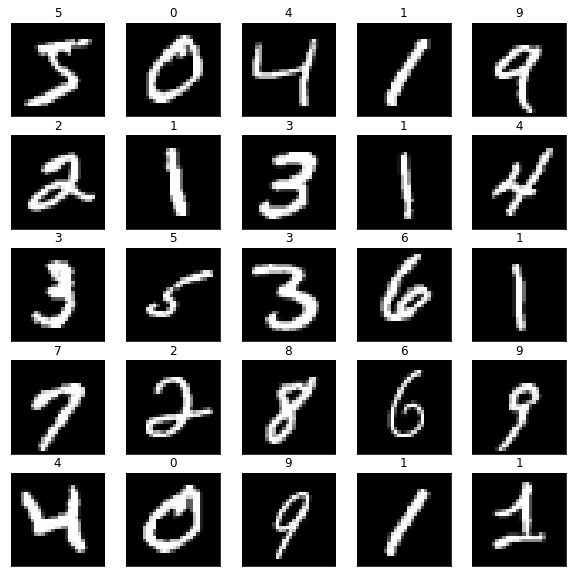

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i])
plt.show()

##### <i>Before Normalization </i>

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
#Normalizing the datasets
x_train = x_train/255
x_test = x_test /255

##### <i>After Normalization </i>
Normalization is a technique used to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.<br> 

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
x_train.shape

(60000, 28, 28, 1)

In [10]:
print(y_train)
print(y_test)

[5 0 4 ... 5 6 8]
[7 2 1 ... 4 5 6]


<br> 

## <center><i>Building the Model</i>

In [11]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.python.keras.callbacks import EarlyStopping

In [12]:
m1 = Sequential()
m1.add(Conv2D(64,(3,3),input_shape = (28,28,1),activation ="relu"))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(32,(3,3),activation ="relu"))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dropout(0.25))
m1.add(Dense(64,activation='relu'))
m1.add(Dropout(0.25))
m1.add(Dense(32,activation='relu'))
m1.add(Dropout(0.25))
m1.add(Dense(10,activation='softmax'))

 

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [13]:
es = EarlyStopping(monitor='val_loss',patience=5)

In [2]:
# m1.summary()

In [15]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30,callbacks=[es])

Epoch 1/30
1875/1875 [==============================] - 63s 33ms/step - loss: 0.3296 - accuracy: 0.8999 - val_loss: 0.0544 - val_accuracy: 0.9829
Epoch 2/30
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1238 - accuracy: 0.9657 - val_loss: 0.0399 - val_accuracy: 0.9874
Epoch 3/30
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0984 - accuracy: 0.9735 - val_loss: 0.0378 - val_accuracy: 0.9882
Epoch 4/30
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0813 - accuracy: 0.9780 - val_loss: 0.0319 - val_accuracy: 0.9911
Epoch 5/30
1875/1875 [==============================] - 64s 34ms/step - loss: 0.0695 - accuracy: 0.9812 - val_loss: 0.0319 - val_accuracy: 0.9898
Epoch 6/30
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0653 - accuracy: 0.9824 - val_loss: 0.0341 - val_accuracy: 0.9901
Epoch 7/30
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0575 - accuracy: 0.9845 - val_loss: 0.0308 -

In [16]:
r1 = pd.DataFrame(h1.history)
r1['Epoch'] = h1.epoch
r1 

loss  accuracy  val_loss  val_accuracy  Epoch
0   0.329579  0.899883  0.054449        0.9829      0
1   0.123824  0.965667  0.039900        0.9874      1
2   0.098423  0.973517  0.037805        0.9882      2
3   0.081296  0.977983  0.031891        0.9911      3
4   0.069451  0.981200  0.031941        0.9898      4
5   0.065269  0.982367  0.034140        0.9901      5
6   0.057474  0.984467  0.030772        0.9905      6
7   0.054180  0.985550  0.026570        0.9920      7
8   0.051251  0.985817  0.027385        0.9924      8
9   0.049444  0.986350  0.029016        0.9911      9
10  0.044950  0.987900  0.026668        0.9921     10
11  0.043935  0.987833  0.027290        0.9919     11
12  0.041457  0.988317  0.026279        0.9921     12
13  0.041551  0.988600  0.028875        0.9923     13
14  0.036328  0.989983  0.024827        0.9926     14
15  0.039556  0.989150  0.025446        0.9924     15
16  0.036314  0.989483  0.024383        0.9929     16
17  0.034363  0.990283  0.027870        0.9925     17
18  0.034915  0.989817  0.026049        0.9932     18
19  0.033017  0.990500  0.026810        0.9933     19
20  0.029269  0.991183  0.029950        0.9924     20
21  0.031033  0.990933  0.030408        0.9924     21

#### <i>loss vs. val_loss on line chart</i>

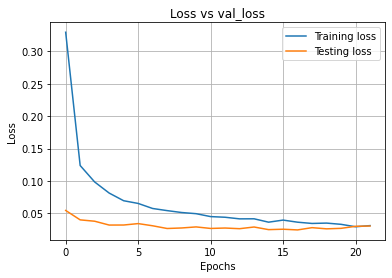

In [18]:
plt.plot(r1['Epoch'],r1['loss'],label='Training loss')
plt.plot(r1['Epoch'],r1['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs val_loss')
plt.legend()
plt.grid()
plt.show()

#### <i>Accuracy vs. val_accuracy on line chart.</i>

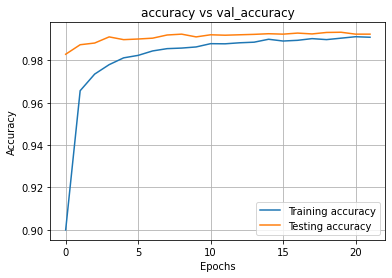

In [19]:
plt.plot(r1['Epoch'],r1['accuracy'],label='Training accuracy')
plt.plot(r1['Epoch'],r1['val_accuracy'],label='Testing accuracy')
plt.xlabel('Epochs')
plt.title('accuracy vs val_accuracy')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## <center> <i>Predictions on test_data</i> 


In [20]:
x_test.shape

(10000, 28, 28, 1)

In [21]:
ypred = m1.predict(x_test)
print(ypred)

[[2.22403770e-22 2.33815890e-14 3.48000952e-13 ... 1.00000000e+00
  9.80316353e-19 4.25415649e-12]
 [1.00807485e-13 2.77809620e-09 1.00000000e+00 ... 2.43030371e-14
  3.28084933e-12 1.39159479e-18]
 [1.01202702e-15 1.00000000e+00 4.39212902e-12 ... 5.13374456e-12
  8.87393186e-13 4.88489491e-14]
 ...
 [1.42726269e-23 1.36694667e-16 2.51280699e-18 ... 2.86852858e-14
  4.09258537e-13 4.44604780e-08]
 [1.08984098e-17 6.15559054e-21 4.91154867e-18 ... 2.16584117e-21
  2.32474748e-10 4.75154534e-11]
 [8.45677945e-08 4.62597127e-10 1.70319456e-08 ... 6.04038931e-15
  6.43179078e-07 2.19411538e-11]]


In [22]:
print(y_test.shape)
print(ypred.shape)

(10000,)
(10000, 10)


In [23]:
res1 = pd.DataFrame({'y_test':y_test,'y_pred':[*ypred]})
res1.head()

y_test                                             y_pred
0       7  [2.2240377e-22, 2.3381589e-14, 3.4800095e-13, ...
1       2  [1.00807485e-13, 2.7780962e-09, 1.0, 6.368167e...
2       1  [1.012027e-15, 1.0, 4.392129e-12, 5.6413797e-1...
3       0  [1.0, 5.5305414e-14, 2.0595718e-11, 4.4081655e...
4       4  [6.903843e-17, 7.967253e-16, 6.226717e-16, 1.2...

In [24]:
ypred_m1 = [np.argmax(i) for i in ypred]
# print(ypred_m1)

<br><br>
#### <i> Confusion matrix and classification report</i>

In [25]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[ 976    1    0    0    0    0    1    1    1    0]
 [   0 1131    0    1    0    2    0    1    0    0]
 [   2    1 1022    1    0    0    0    5    1    0]
 [   0    0    1 1006    0    1    0    1    1    0]
 [   0    0    0    0  974    0    1    0    1    6]
 [   0    0    0    3    0  886    1    1    0    1]
 [   7    4    0    0    1    3  941    0    2    0]
 [   0    3    3    0    1    0    0 1021    0    0]
 [   1    0    2    0    0    0    0    1  968    2]
 [   0    1    0    0    3    3    0    3    0  999]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99   